<a href="https://colab.research.google.com/github/paulo-santos-ds/Machine-Learning/blob/main/Primeiros_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_wine

from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier

In [76]:
data = load_wine()
df = pd.DataFrame(data['data'])
df.columns = data['feature_names']
df['target'] = data['target']
df['target'] = 'class_'+df['target'].astype(str)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [77]:
cols = df.columns.drop(['target'])
label = 'target'

In [78]:
X_train, X_test, y_train, y_test = train_test_split(df[cols].values, df[label].values, 
                                                    test_size=0.33, random_state=42)

In [79]:
len(cols)

13

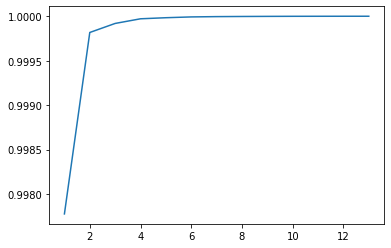

In [80]:
pca = PCA(n_components=len(cols))
pca.fit(X_train)
variancia = pca.explained_variance_ratio_
var_explicada = []
for i in range(0,len(cols)):
    var_explicada.append(sum(variancia[:i+1]))

plt.plot(range(1,len(cols)+1),var_explicada)
plt.show()

# Importante: fit de qualquer técnica ou modelo é sempre nos dados de treino, nunca nos dados de teste ou validação

In [81]:
pca = PCA(n_components=4)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [82]:
clf = DecisionTreeClassifier(random_state = 32, max_depth=2)
clf.fit(X = X_train_pca, y = y_train)

DecisionTreeClassifier(max_depth=2, random_state=32)

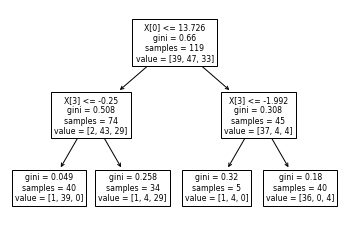

In [83]:
from sklearn import tree
tree.plot_tree(clf)
plt.show()

In [84]:
prev = clf.predict(X_test_pca)

sum(prev==y_test)/len(y_test)

0.864406779661017

### Linerização de dados

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

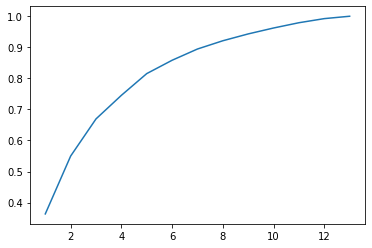

In [87]:
pca = PCA(n_components=len(cols))
pca.fit(X_train)
variancia = pca.explained_variance_ratio_
var_explicada = []
for i in range(0,len(cols)):
    var_explicada.append(sum(variancia[:i+1]))

plt.plot(range(1,len(cols)+1),var_explicada)
plt.show()

In [88]:
var_explicada

[0.36351131923072266,
 0.5498498695633058,
 0.6694798255142032,
 0.7453623398515672,
 0.8153402357464177,
 0.858292996391206,
 0.8945000102640377,
 0.9210860590566016,
 0.9430892570126036,
 0.9621457468793702,
 0.9791309575584619,
 0.9923501591980335,
 1.0000000000000002]

In [89]:
pca = PCA(n_components=8)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [90]:
clf = DecisionTreeClassifier(random_state = 32, max_depth=2)
clf.fit(X = X_train_pca, y = y_train)

DecisionTreeClassifier(max_depth=2, random_state=32)

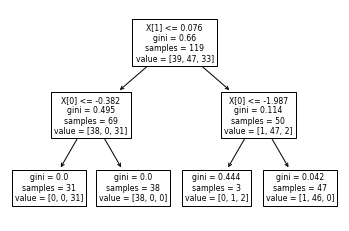

In [91]:
from sklearn import tree
tree.plot_tree(clf)
plt.show()

In [92]:
prev = clf.predict(X_test_pca)

sum(prev==y_test)/len(y_test)

0.9491525423728814

## Modelos de Regressão

In [93]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

df = pd.DataFrame(data['data'])
df.columns = data['feature_names']
df['target'] = data['target']
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [94]:
cols = df.columns.drop('target')
label = 'target'

In [95]:
X_train, X_test, y_train, y_test = train_test_split(df[cols].values, df[label].values, 
                                                    test_size=0.33, random_state=42)

In [96]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [97]:
pred = reg.predict(X_test)

In [98]:
reg.intercept_

150.4339752023493

In [99]:
reg.coef_

array([  32.14567288, -242.82582016,  559.98738213,  407.64166457,
       -718.68703857,  396.63010925,   10.42304776,  171.81177553,
        627.07976426,  -21.62420711])

In [100]:
cols

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [101]:
#y = ax+b >>> y = b + aixi+ aiixii + a3x3+...+anxn

In [102]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, pred))

53.08296873921689

#### Random forest regressor

In [103]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(max_depth=2)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
np.sqrt(mean_squared_error(y_test, pred))

55.86887232147103

In [104]:
len(reg.estimators_)

100

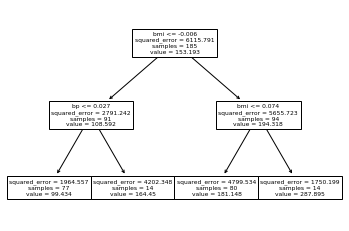

In [105]:
tree.plot_tree(reg.estimators_[0], feature_names=cols)
plt.show()

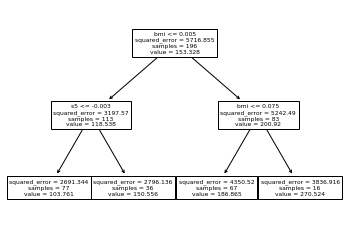

In [106]:
tree.plot_tree(reg.estimators_[71], feature_names=cols)
plt.show()

In [107]:
data = load_wine()
df = pd.DataFrame(data['data'])
df.columns = data['feature_names']
df['target'] = data['target']
df['target'] = 'class_'+df['target'].astype(str)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [108]:
cols = df.columns.drop('target')

label = 'target'

In [109]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(df[cols])

In [110]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df[cols])
    distortions.append(kmeanModel.inertia_)

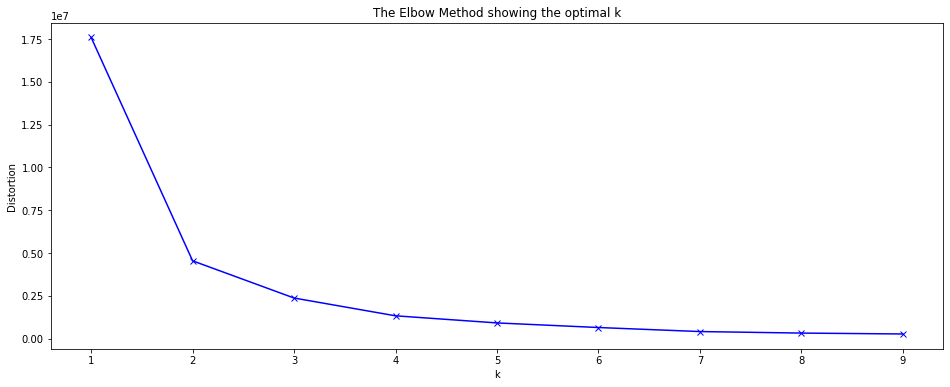

In [111]:
plt.figure(figsize=(16,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [112]:
## numero ideal de cluster seria 3
kmeans = KMeans(n_clusters=3, random_state=0).fit(df[cols])

df['pred'] = kmeans.predict(df[cols])

In [113]:
df['pred'] = 'class_'+df['pred'].astype(str)

In [114]:
sum(df['target'] == df['pred'])/df.shape[0]

0.1853932584269663

In [115]:
df[df['target']=='class_0']['pred'].value_counts('percentage')

class_1    0.779661
class_0    0.220339
Name: pred, dtype: float64

In [116]:
df[df['target']=='class_1']['pred'].value_counts('percentage')

class_2    0.704225
class_0    0.281690
class_1    0.014085
Name: pred, dtype: float64

In [117]:
df[df['target']=='class_2']['pred'].value_counts('percentage')

class_0    0.604167
class_2    0.395833
Name: pred, dtype: float64

In [118]:
df.loc[df['pred'] == 'class_0','pred'] = 'class_4'

df.loc[df['pred'] == 'class_1','pred'] = 'class_0'

df.loc[df['pred'] == 'class_2','pred'] = 'class_1'

df.loc[df['pred'] == 'class_4','pred'] = 'class_2'

In [119]:
sum(df['target'] == df['pred'])/df.shape[0]

0.702247191011236